### Census Data

- Data exploration
- Data preprocessing
- Applying ML Algorithms
- Hyper parameter optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,\
                            recall_score,f1_score,confusion_matrix
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import confusion_matrix


In [3]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
features = data.drop('income',axis = 1)
target = data['income']

## Number Data Analysis

In [5]:
features.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# add a new row for previous output
# with label range and values are max-min of that column

num_desc = features.describe()
num_desc.loc['min']

age                   17.0
fnlwgt             12285.0
educational-num        1.0
capital-gain           0.0
capital-loss           0.0
hours-per-week         1.0
Name: min, dtype: float64

In [7]:
type(num_desc.loc['min'])

pandas.core.series.Series

In [8]:
num_desc = features.describe()
num_desc.loc['range'] = num_desc.loc['max'] - num_desc.loc['min']
num_desc

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000
range,73.000000,1.478115e+06,15.000000,99999.000000,4356.000000,98.000000


In [9]:
# column count of each data type
# not null objs in each column

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E16A8E470>,
      dtype=object)

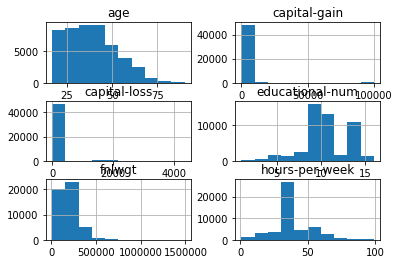

In [10]:
# observe histograms using pandas
features.hist()

([<matplotlib.axis.YTick at 0x23e171b53c8>,
 <a list of 10 Text yticklabel objects>)

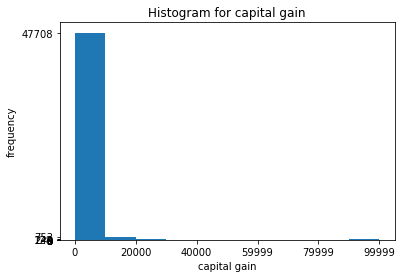

In [11]:
# capital gain and capital loss features skewness is high
# these 2 features are positively skewed
# plot them using matplotlib
bin_values = plt.hist(features['capital-gain'])
plt.title('Histogram for capital gain')
plt.xlabel('capital gain')
plt.ylabel('frequency')
plt.xticks(bin_values[1][::2])
plt.yticks(bin_values[0])

In [12]:
bin_values

(array([4.7708e+04, 7.5300e+02, 1.2800e+02, 6.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4400e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'frequency')

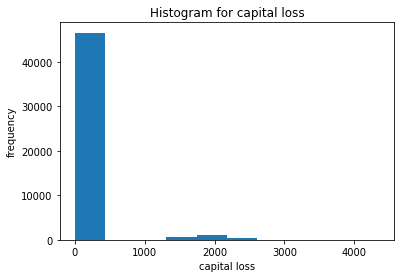

In [13]:
plt.hist(features['capital-loss'])
plt.title('Histogram for capital loss')
plt.xlabel('capital loss')
plt.ylabel('frequency')

## Apply log for the skewed columns

In [14]:
features['capital-gain'] = np.log1p(features['capital-gain'])
features['capital-loss'] = np.log1p(features['capital-loss'])

Text(0, 0.5, 'frequency')

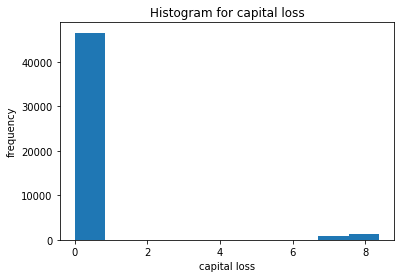

In [15]:
plt.hist(features['capital-loss'])
plt.title('Histogram for capital loss')
plt.xlabel('capital loss')
plt.ylabel('frequency')

In [16]:
data['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
1740       58
1672       50
1741       44
1564       43
2258       39
1719       38
1980       36
2001       35
1408       35
1669       35
2002       33
1579       30
2051       29
1974       28
1721       28
2339       27
1504       26
2377       25
1628       24
1762       20
        ...  
1411        4
4356        3
419         3
1944        3
2267        3
1510        3
1735        3
1429        3
1844        3
1648        3
3175        2
2163        2
2467        2
3683        2
2352        2
2754        2
2282        2
3900        2
810         2
1755        2
974         2
2080        1
2465        1
1911        1
155         1
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

## Apply scaling for all the numerical columns

In [17]:
num_cols = features.columns[features.dtypes != object]
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [18]:
# Use MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
# create an instance of the scaler
sc = MinMaxScaler()
# fit and transform the numerical data
features[num_cols] = sc.fit_transform(features[num_cols])

In [19]:
#after scaling observe the stats
features.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.120004,0.605206,0.063281,0.041885,0.402269
std,0.187815,0.071445,0.171398,0.212412,0.189298,0.126443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071216,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112210,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152462,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E16C60B38>,
      dtype=object)

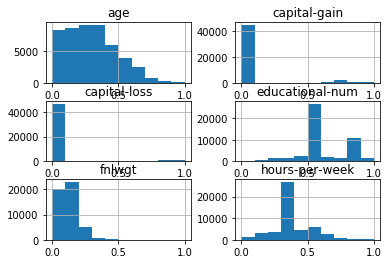

In [20]:
# after scaling observe hist
features.hist()

## Categorical columns preprocessing

In [21]:
cat_cols = features.columns[features.dtypes==object]
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [22]:
#check the no of unique values in
# each categorical column
features[cat_cols].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
dtype: int64

In [23]:
# total unique value count in cat columns
features[cat_cols].nunique().sum()

102

after applying 1 hot encoding or pd.get_dummies. they will generate 102 new columns which will add in the output data frame

In [24]:
# total no of columns in the final df is
features.shape[1] + features[cat_cols].nunique().sum() - len(cat_cols)

108

In [25]:
# create dummy columns and updates the features
features = pd.get_dummies(features)

In [26]:
#check rows and columns
features.shape

(48842, 108)

In [27]:
features.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=108)

In [28]:
data.gender[:5]

0      Male
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [29]:
features[['gender_Male','gender_Female']]

,gender_Male,gender_Female
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [30]:
features.iloc[:,31:38]

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0
8,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0


## convert the  target in to binary

In [31]:
target.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [32]:
target.apply(lambda x:0 if x=='<=50K'else 1)

0        0
1        0
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        0
10       1
11       0
12       0
13       0
14       1
15       1
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
48812    0
48813    1
48814    1
48815    0
48816    0
48817    1
48818    0
48819    1
48820    1
48821    0
48822    0
48823    0
48824    0
48825    0
48826    1
48827    0
48828    0
48829    0
48830    0
48831    0
48832    0
48833    0
48834    0
48835    1
48836    0
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [33]:
target = data['income']
(target.apply(lambda x:0 if x=='<=50K'else 1)).value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [34]:
target = data['income']
target = target.apply(lambda x:0 if x=='<=50K'else 1)
target.value_counts()

0    37155
1    11687
Name: income, dtype: int64

### split the data ste into 2 parts 80% for the training and 20% for testing

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split\
        (features,target,test_size = 0.2,random_state=23)

In [36]:
# check the class distribution in train data
y_train.value_counts(normalize = True)

0    0.758708
1    0.241292
Name: income, dtype: float64

In [37]:
# check the class distribution in test data
y_test.value_counts(normalize = True)

0    0.768758
1    0.231242
Name: income, dtype: float64

### Apply GuaussianNB

In [38]:
# import the classifier
from sklearn.naive_bayes import GaussianNB
#create an instance of the classifier
nb = GaussianNB()
# Train the model with training data
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
#predit the class for the test data
from sklearn.metrics import f1_score
y_pred = nb.predict(x_test)
f1_score(y_pred,y_test)

0.5195453977769452

### Apply KNeighborClassifier

In [40]:
#import the classifier
from sklearn.neighbors import KNeighborsClassifier
#create an intstrance of the classifier
knn = KNeighborsClassifier()
# Train the model with training data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
# Predict the class for test data
y_pred = knn.predict(x_test)
f1_score(y_pred,y_test)

0.6072985999540967

### Apply SGDC

In [43]:
#import the classifier
from sklearn.linear_model import SGDClassifier
#create an intstrance of the classifier
sgdc = SGDClassifier()
# Train the model with training data
sgdc.fit(x_train,y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
# Predict the class for test data
y_pred = sgdc.predict(x_test)
f1_score(y_pred,y_test)

0.6390940423436731

### Apply Logistic Regression

In [46]:
#import the classifier
from sklearn.linear_model import LogisticRegression
#create an intstrance of the classifier
lr = LogisticRegression()
# Train the model with training data
lr.fit(x_train,y_train) 

E:\anaconda app\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Predict the class for test data
y_pred = lr.predict(x_test)
f1_score(y_pred,y_test)

0.6433734939759036